# Cubic splines

The file `cubic_splines.pdf` presents some notes about the cubic splines method.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

#used for inserting images
from IPython.display import Image as img

In [2]:
L = 5
x = np.linspace(0., 10., L) # x coordinates of the data
y = np.sin(2.*np.pi*x/10.)  # data values

In [3]:
x0 = np.linspace(0., 10., 5+3*4) # x coordinates of the interpolating points
y0 = np.sin(2.*np.pi*x0/10.)   # true values of the original function at the interpolation points

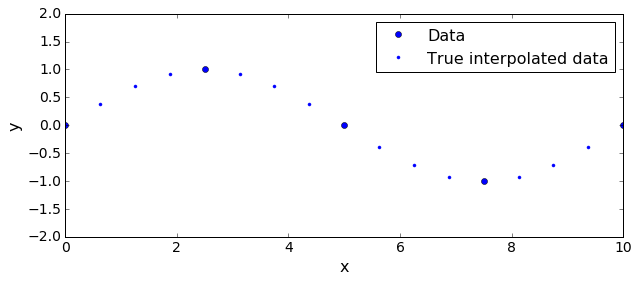

In [4]:
plt.figure(figsize=(10,10))
plt.axis('scaled')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b.', label='True interpolated data')
plt.xlim(np.min(x0), np.max(x0))
plt.ylim(-2., 2.)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', numpoints=1, fontsize=16)
plt.show()

In [5]:
def spline3(x, f):
    
    L = f.size
    
    g = 3.*np.hstack(((f[1] - f[0]), (f[2:] - f[:L-2]), (f[-1] - f[-2])))

    indices = np.arange(L)
    A = np.zeros((L,L))
    A[indices[1:L-1],indices[1:L-1]] = 4
    A[0,0] = 2
    A[L-1,L-1] = 2
    A[indices[:L-1],indices[1:]] = 1
    A[indices[1:],indices[:L-1]] = 1
    
    D = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, g))
    
    c = 3.*(f[1:] - f[:L-1]) - 2.*D[:L-1] - D[1:]
    d = 2.*(f[:L-1] - f[1:]) + D[:L-1] + D[1:]
    
    return D, c, d

In [6]:
def spline3_interpolate(a,b,c,d,t,x):
    
    y0 = np.empty((a.size,t.size))
    
    e = t.copy()
    
    for i, ai in enumerate(a):
        y0[i] = ai
    for i, bi in enumerate(b):
        y0[i] += bi*e
    e = e*t
    for i, ci in enumerate(c):
        y0[i] += ci*e
    e = e*t
    for i, di in enumerate(d):
        y0[i] += di*e
    
    #for i, (ai, bi, ci, di) in enumerate(zip(a,b,c,d)):
    #    y0[i] = ai + bi*t + ci*t*t + di*t*t*t
    
    y0 = np.ravel(y0)
    
    x0 = np.empty((a.size,t.size))
    for i in range(a.size):
        dx = x[i+1] - x[i]
        x0[i] = x[i] + dx*t
    x0 = np.ravel(x0)
    
    return x0, y0

In [7]:
b,c,d = spline3(x,y)

In [8]:
t = np.linspace(0.25, 0.75, 3)

In [9]:
x0_calc, y0_calc = spline3_interpolate(y[:L-1],b[:L-1],c,d,t,x)

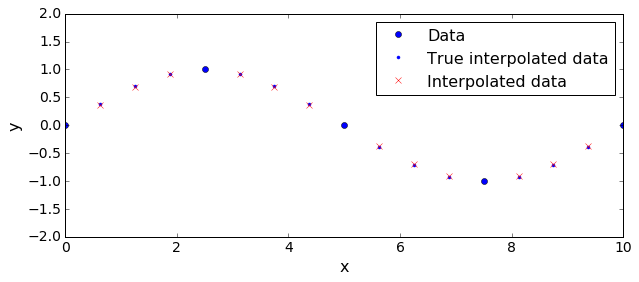

In [10]:
plt.figure(figsize=(10,10))
plt.axis('scaled')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b.', label='True interpolated data')
plt.plot(x0_calc, y0_calc, 'xr', label='Interpolated data')
plt.xlim(np.min(x0), np.max(x0))
plt.ylim(-2., 2.)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', numpoints=1, fontsize=16)
plt.show()

### Exercise 25

The folder `synthetic_gravity_data` contains a jupyter notebook named [`synthetic_data_fatiando.ipynb`](https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/synthetic_gravity_data/synthetic_data_fatiando.ipynb). This code uses the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://www.fatiando.org/) for calculating the gravity anomaly produced by the following synthetic body:

In [ ]:
img('synthetic_gravity_data/model.png')

The synthetic body shown above produces the gravity anomaly shown below:

In [ ]:
img('synthetic_gravity_data/map.png')

In [ ]:
img('synthetic_gravity_data/profile.png')

The files `synthetic_gravity_data/gravity_anomaly.txt` and `synthetic_gravity_data/gravity_anomaly_profile.txt` contain, respectively, the synthetic gravity anomaly map and the gravity anomaly profile on x = 0 m.

To solve this exercise:

1. Load the file `synthetic_gravity_data/gravity_anomaly_profile.txt` by using the routine [`numpy.loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). 

2. Use the function `my_neville` to calculate one interpolated gravity data between two adjacent gravity data (black dots on the gravity profile) on the profile.

3. Plot a Figure similar to the gravity profile shown above containing: (i) the original data (black dots on the gravity profile) and (ii) the interpolated points.